### Eksik Veri Nedir?
İncelenen veri setindeki gözlemlerde eksiklik olması durumunu ifade etmektedir.

> Eksik değere sahip gözlemlerin veri setinden direk çıkarılması ve rassallığının incelenmemesi yapılacak İstatistiksel çıkarımların, modelleme çalışmalarının güvenilirliğini düşürecektir. (Alpar, 2011)

> Eksik gözlemlerin veri setinden direk çıkarılabilmesi için veri setindeki eksikliğin bazı durumlarda kısmen bazı durumlarda tamamen rastlantısal
olarak oluşmuş olması gerekmektedir. Eğer eksiklikler değişkenler ile ilişkili olarak ortaya çıkan yapısal problemler ile meydana gelmiş ise bu durumda yapılacak silme işlemleri ciddi yanlılıklara sebep olabilecektir. (Tabachnick ve Fidell, 1996)

#### Eksik Veriyi Direk Silmenin Zararları

1. Veri setindeki eksikliğin yapısal bir eksiklik olup olmadığının (yani bu eksiklik yapısal bir problemden dolayı mı yoksa rastgele mi oluştu?) bilinmesi gerekir!
    
    Örneğin şekildeki tabloda Kredi Kartı Harcamasının bulunduğu sütunda bir eksik değer var. Fakat bu rastgele değil yanındaki Kredi Kartı Sahibi olmama durumu sütununa bağlı olarak yapısal bir problem olarak oluşmuş.

    ![eksikgozlem_ornek](../images/veri_on_isleme/eksik_gozlem_ornek.jpg)

2. NA her zaman eksiklik anlamına gelmez!

    Örneğin şekildeki tabloda Kredi Kartı Harcamasının bulunduğu sütunda bir eksik değer var. Fakat bu yanındaki Kredi Kartı Sahibi Olma Durumu sütununda 1 (Kredi Kartına sahip). Birey kredi kartına sahip fakat ya kredi kartını yeni almış ya da kredi kartı olmasına rağmen bu ay harcama yapmamış olabilir. İşte buradaki NA diye gözüken aslında eksik değer değil bunu 0 olarak kabul edebiliriz.
    
    ![eksikgozlem_ornek](../images/veri_on_isleme/eksik_gozlem_ornek2.jpg)

3. Bilgi Kaybı!

    Örneğin elimizde bir veri seti var ve bu veri setinde 100 tane sütun değişkeni var. Diyelim ki bir değişkenin gözlem değerinde bir yada iki tane eksiklik (NA) var. Yani 99 değişkenin tüm değerleri tam, 100.değişkenin bir değerinde eksiklik var. Şimdi biz bu eksik değeri bulunduğu satırdan silmek istediğimizde onla beraber aynı satırda yer alan 99 değişkeninin gözlem değerlerini de silmiş olacağız. Bu da 99 tane farklı bilgiyi kaybetmemiz, haliyle çok çok ciddi bir bilgi kaybına sebep olmamız anlamına geliyor.

#### Eksik Veri Türleri Nelerdir?
- Tümüyle Raslantısal Kayıp: Diğer değişkenlerden ya da yapısal bir problemden kaynaklanmayan tamamen rastgele oluşan gözlemler.
- Raslantısal Kayıp: Diğer değişkenlere bağlı olarak oluşabilen eksiklik türü.
- Raslantısal Olmayan Kayıp: Göz ardı edilemeyecek olan ve yapısal problemler ile ortaya çıkan eksiklik türü.

#### Eksik Veri Rassallığının Testi
- Görsel Teknikler
- Bağımsız iki örneklem t testi
- Korelasyon testi
- Little'nin MCAR testi

#### Eksik Veri Problemi Nasıl Giderilir?
- Silme Yöntemleri
    - Gözlem ya da değişken silme yöntemi
    - Liste bazında silme yöntemi (Listwise Method)
    - Çiftler bazında silme yöntemi (Pairwise Method)
- Değer Atama Yöntemleri
    - Ortanca, ortalama, medyan
    - En Benzer Birime Atama (hot deck)
    - Dış Kaynaklı Atama
- Tahmine Dayalı Yöntemler
    - Makine Öğrenmesi
    - EM
    - Çoklu Atama Yöntemi

### Eksik Veri Hızlı Çözüm

In [78]:
import numpy as np
import pandas as pd

# Üç tane farklı liste oluşturup hepsinin aralarına eksik değerler yerleştirelim
V1 = np.array([1,3,6, np.NaN, 7, 1, np.NaN, 9, 15])
V2 = np.array([7, np.NaN, 5, 8, 12, np.NaN, np.NaN, 2, 3])
V3 = np.array([np.NaN, 12, 5, 6, 14, 7, np.NaN, 2, 31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


#### Eksik Değerlerin Saptanması

In [79]:
# Değişkenlerdeki eksik değer sayısı
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [80]:
# notnull(): boş olmayanlar

# Değişkenlerdeki tam değer sayısı
df.notnull().sum()

V1    7
V2    6
V3    7
dtype: int64

In [81]:
# Veri setindeki toplam eksik değer sayısı
df.isnull().sum().sum()

7

In [82]:
# En az bir eksik değere sahip gözlemler
df[df.isnull().any(axis= 1)]

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [83]:
# Tüm değerleri tam olan gözlemler
df[df.notnull().all(axis= 1)]

# all: hepsi
# any: hiç, herhangi bir tanesi bile

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [84]:
# all() fonksiyonunu kullanmadan aynı işlemi şu şekilde de yapabiliriz
df[df["V1"].notnull() & df["V2"].notnull() & df["V3"].notnull()]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


# Eksik Değer Problemini Çözme

#### 1- Eksik değerlerin direk silinmesi

In [85]:
# Eksik değerlerin direk silinmesi
df.dropna() # Bir gözlem biriminde bir tane bile eksik değer varsa o gözlem birimini komple uçuruyor yani siliyor.

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


#### 2- Basit Değer Atama ile Doldurulması

In [86]:
df["V1"].fillna(df["V1"].mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [87]:
df["V2"].fillna(0)

0     7.0
1     0.0
2     5.0
3     8.0
4    12.0
5     0.0
6     0.0
7     2.0
8     3.0
Name: V2, dtype: float64

In [88]:
df.apply(lambda x: x.fillna(x.mean()), axis= 0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


### Eksik Veri Yapısının Görselleştirilmesi

In [89]:
!pip install missingno

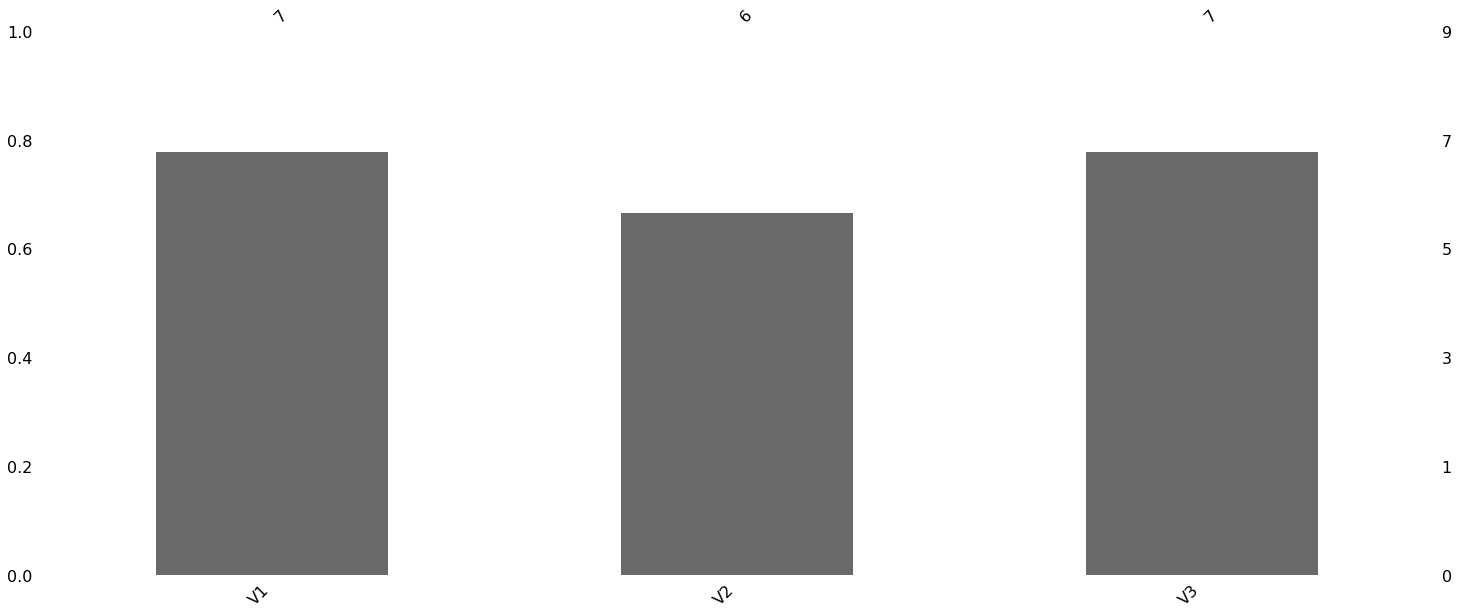

In [90]:
import missingno as msno

# Veri setindeki değişkenleri görselleştirelim
# Değişkenlerdeki eksikliği oransal olarak bu grafik ifade ediyor
msno.bar(df);

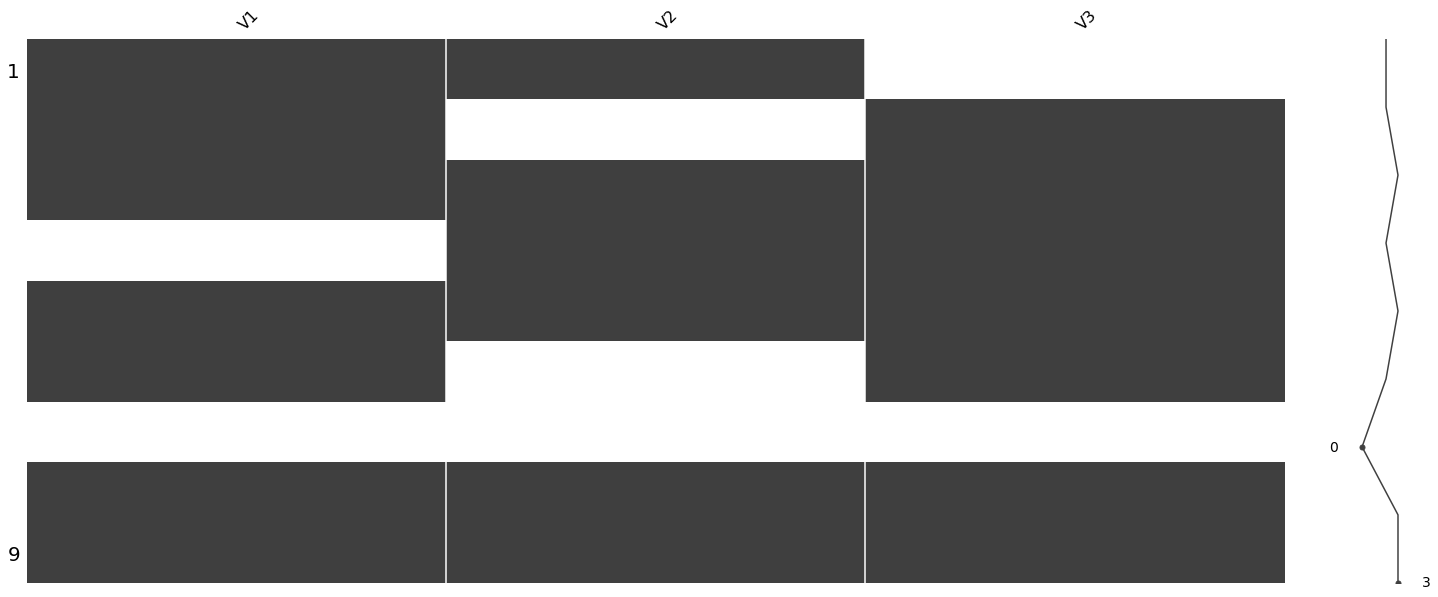

In [91]:
# Bu grafik bize bahsetmiş olduğumuz eksik değerlerin rastsallığıyla ilgili gerekli yapısal bozuklukları yakalayabilme imkanı veren bir görsel
msno.matrix(df);

In [92]:
import seaborn as sns
df = sns.load_dataset('planets')
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [93]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

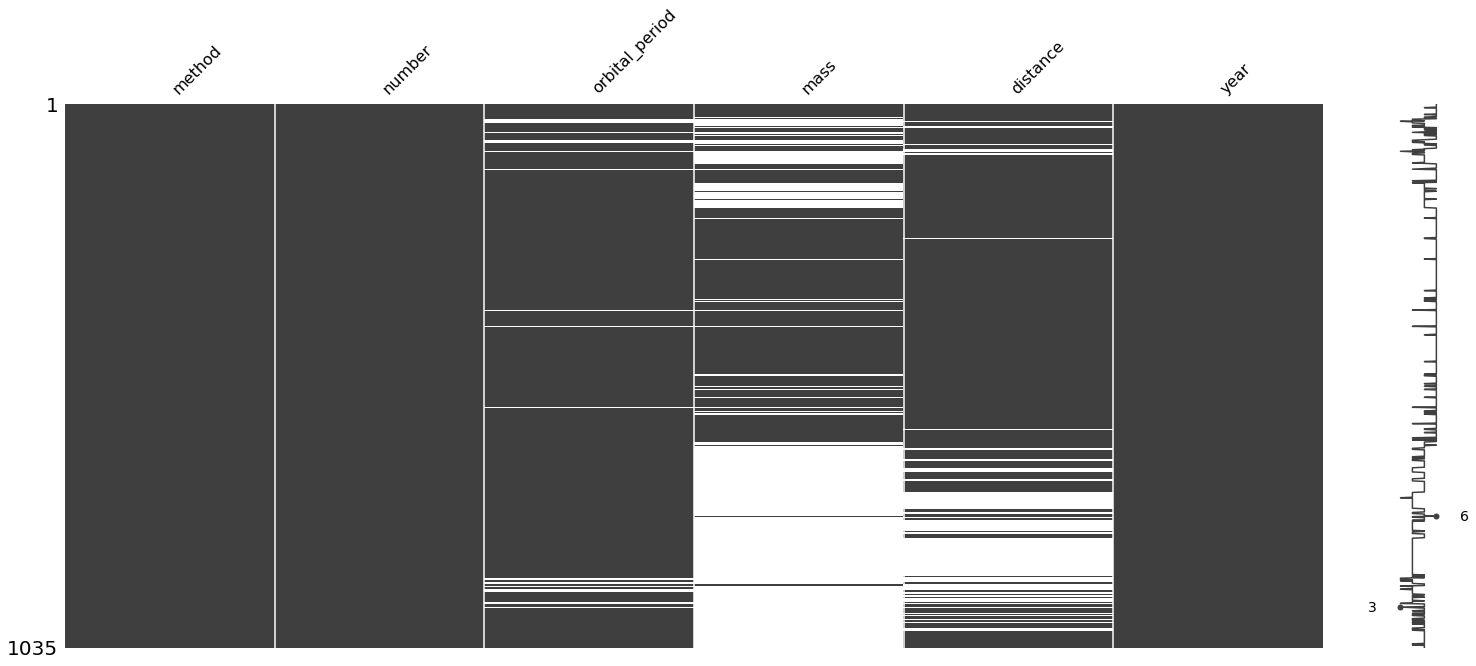

In [94]:
msno.matrix(df);

Yukarıdaki grafikten çıkaracağımız yorumumuz şudur; Görünen o ki burada değişkenler arasında ciddi bir bağımlılık söz konusu ve bu veri setine özel eksik değerlerin rastgele oluşmadığı yorumunu yaparız.

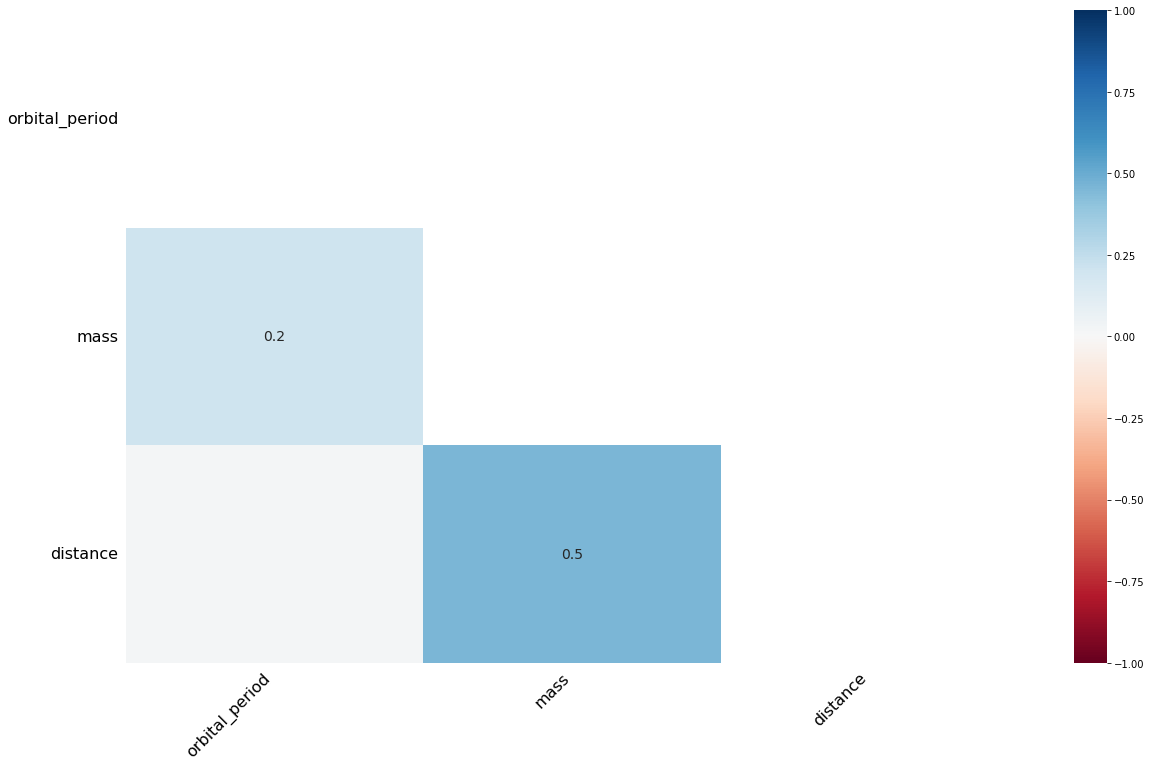

In [95]:
# heatmap ile değişkenler arasındaki ilişkiye bakalım 

# msno içerisindeki ısı haritası (heatmap) bize nullity correlation isminde bir korelasyon (ilişki) değeri verir. 
# Bu değerler -1 ile +1 arasında yer alır.
msno.heatmap(df);

### Silme Yöntemleri

In [96]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6, np.NaN, 7, 1, np.NaN, 9, 15])
V2 = np.array([7, np.NaN, 5, 8, 12, np.NaN, np.NaN, 2, 3])
V3 = np.array([np.NaN, 12, 5, 6, 14, 7, np.NaN, 2, 31])
V4 = np.array([99, 7, 64, 19, 38, 42, 13, 29, 71])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3,
         "V4" : V4}
)

df

,V1,V2,V3,V4
0,1.0,7.0,NaN,99
1,3.0,NaN,12.0,7
2,6.0,5.0,5.0,64
3,NaN,8.0,6.0,19
4,7.0,12.0,14.0,38
5,1.0,NaN,7.0,42
6,NaN,NaN,NaN,13
7,9.0,2.0,2.0,29
8,15.0,3.0,31.0,71


#### 1- En az bir eksik değere sahip tüm gözlemlerin silinmesi

In [97]:
df.dropna()

,V1,V2,V3,V4
2,6.0,5.0,5.0,64
4,7.0,12.0,14.0,38
7,9.0,2.0,2.0,29
8,15.0,3.0,31.0,71


#### 2- Tüm gözlem değerleri aynı anda NA olan gözlemlerin silinmesi

In [98]:
# how: nasıl?
# Hepsi aynı anda eksik ise
df.dropna(how= "all")

,V1,V2,V3,V4
0,1.0,7.0,NaN,99
1,3.0,NaN,12.0,7
2,6.0,5.0,5.0,64
3,NaN,8.0,6.0,19
4,7.0,12.0,14.0,38
5,1.0,NaN,7.0,42
6,NaN,NaN,NaN,13
7,9.0,2.0,2.0,29
8,15.0,3.0,31.0,71


#### 3- Değişkenler Bazında Silmek

In [99]:
# Değişken bazında düşünüldüğünde en az bir tane eksik değere sahip olan değişkeni silme işlemi
df.dropna(axis= 1)

,V4
0,99
1,7
2,64
3,19
4,38
5,42
6,13
7,29
8,71


In [100]:
df["sil_beni"] = np.nan
df 

,V1,V2,V3,V4,sil_beni
0,1.0,7.0,NaN,99,NaN
1,3.0,NaN,12.0,7,NaN
2,6.0,5.0,5.0,64,NaN
3,NaN,8.0,6.0,19,NaN
4,7.0,12.0,14.0,38,NaN
5,1.0,NaN,7.0,42,NaN
6,NaN,NaN,NaN,13,NaN
7,9.0,2.0,2.0,29,NaN
8,15.0,3.0,31.0,71,NaN


In [101]:
# Tüm değerleri NA olan değişkenleri silme işlemi
df.dropna(axis= 1, how= "all", inplace= True)
df 

,V1,V2,V3,V4
0,1.0,7.0,NaN,99
1,3.0,NaN,12.0,7
2,6.0,5.0,5.0,64
3,NaN,8.0,6.0,19
4,7.0,12.0,14.0,38
5,1.0,NaN,7.0,42
6,NaN,NaN,NaN,13
7,9.0,2.0,2.0,29
8,15.0,3.0,31.0,71


### Basit Değer Atama Yöntemleri

In [102]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6, np.NaN, 7, 1, np.NaN, 9, 15])
V2 = np.array([7, np.NaN, 5, 8, 12, np.NaN, np.NaN, 2, 3])
V3 = np.array([np.NaN, 12, 5, 6, 14, 7, np.NaN, 2, 31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


#### Sayısal Değişkenlerde Atama

In [103]:
# V1 değişkenindeki eksik değerleri 0 ile doldurma
df["V1"].fillna(0) 

0     1.0
1     3.0
2     6.0
3     0.0
4     7.0
5     1.0
6     0.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [104]:
# V1 değişkenindeki eksik değerleri V1 değişkeninin ortalaması ile doldurma
df["V1"].fillna(df["V1"].mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [105]:
# Tek tek her değişkenin eksik değerlerini doldurmakla uğraşmak yerine özel bir 
# fonksiyonla bunu tek seferde bütün değişkenler için uygulayalım
df.apply(lambda x: x.fillna(x.mean()), axis= 0) # Tüm değişkenler için 1.yol

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [106]:
# Tüm değişkenler için 2.yol
df.fillna(df.mean()[:]) # [:]: Tüm değişken tüm gözlemler için dikkate al anlamında

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [107]:
df.fillna(df.mean()["V1":"V2"])

,V1,V2,V3
0,1.0,7.000000,NaN
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,NaN
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [108]:
df["V3"].fillna(df["V3"].median())

0     7.0
1    12.0
2     5.0
3     6.0
4    14.0
5     7.0
6     7.0
7     2.0
8    31.0
Name: V3, dtype: float64

In [109]:
# Tüm değişkenler için 3.yol
df.where(pd.notna(df), df.mean(), axis= "columns")
# Bu kod yapısı; yakalamış olduğu dataframe'in içerisindeki eksik değerlerin yerine o değişkenlerin ortalamasını yerleştirmiş oluyor.

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


### Kategorik Değişken Kırılımında Değer Atama

In [110]:
V1 = np.array([1, 3, 6, np.NaN, 7, 1, np.NaN, 9, 15])
V2 = np.array([7, np.NaN, 5, 8, 12, np.NaN, np.NaN, 2, 3])
V3 = np.array([np.NaN, 12, 5, 6, 14, 7, np.NaN, 2, 31])
V4 = np.array(["IT", "IT", "IK", "IK", "IK", "IK", "IK", "IT", "IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2"   : V2,
         "V3"   : V3,
         "departman" : V4}
)

df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [111]:
# Departmanların maaş ortalamalarına bakalım
df.groupby("departman")["maas"].mean()

departman
IK    4.666667
IT    7.000000
Name: maas, dtype: float64

In [112]:
df["maas"].fillna(df.groupby("departman")["maas"].transform("mean"))

# Burada transform kullanmamızın sebebi şu, df["maas"].fillna(df.groupby("departman")["maas"].mean()) 
# dediğimizde mean() fonksiyonunu uygulamıyor, transform ile dönüştürüp o şekilde uygulamasını sağlıyoruz.

0     1.000000
1     3.000000
2     6.000000
3     4.666667
4     7.000000
5     1.000000
6     4.666667
7     9.000000
8    15.000000
Name: maas, dtype: float64

### Kategorik Değişkenler için Eksik Değer Atama

In [113]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6, np.NaN, 7, 1, np.NaN, 9, 15])
V4 = np.array(["IT", np.nan, "IK", "IK", "IK", "IK", "IK", "IT", "IT"], dtype=object)

df = pd.DataFrame(
        {"maas" : V1,
         "departman" : V4}
)

df

,maas,departman
0,1.0,IT
1,3.0,NaN
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


In [114]:
# Sonuna [0] koymazsak eksik değerleri dolduramıyor çünkü mod'unu alırken modunu aldığı değerin 
# index bilgisini de getiriyor. Biz sonuna [0] koyarak index bilgisinin gelmesini engellemiş oluyoruz

df["departman"].fillna(df["departman"].mode()[0]) # Eksik değerleri mod (en çok tekrar eden değer) ile dolduruyoruz

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [115]:
# Eksik değeri kendisinden sonra gelen değer ile dolduralım. Bunun için "bfill" metodunu kullanacağız
df["departman"].fillna(method= "bfill")

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [116]:
# Eksik değeri kendisinden önce gelen değer ile dolduralım. Bunun için "ffill" metodunu kullanacağız
df["departman"].fillna(method= "ffill")

0    IT
1    IT
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

### Tahmine Dayalı Değer Atama Yöntemleri

In [117]:
import seaborn as sns
import missingno as msno
df = sns.load_dataset('titanic')
df = df.select_dtypes(include= ['float64', 'int64'])
print(df.head())
print("\nDeğişkenlerdeki eksik değer sayıları:\n", df.isnull().sum())

   survived  pclass   age  sibsp  parch     fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500

Değişkenlerdeki eksik değer sayıları:
 survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64


In [118]:
!pip install ycimpute

In [119]:
from ycimpute.imputer import knnimput
import numpy as np 

var_names = list(df)
n_df = np.array(df)

n_df[0:10]

array([[ 0.    ,  3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 1.    ,  3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       [ 1.    ,  1.    , 35.    ,  1.    ,  0.    , 53.1   ],
       [ 0.    ,  3.    , 35.    ,  0.    ,  0.    ,  8.05  ],
       [ 0.    ,  3.    ,     nan,  0.    ,  0.    ,  8.4583],
       [ 0.    ,  1.    , 54.    ,  0.    ,  0.    , 51.8625],
       [ 0.    ,  3.    ,  2.    ,  3.    ,  1.    , 21.075 ],
       [ 1.    ,  3.    , 27.    ,  0.    ,  2.    , 11.1333],
       [ 1.    ,  2.    , 14.    ,  1.    ,  0.    , 30.0708]])

In [120]:
n_df.shape

(891, 6)

In [121]:
# k: komşuluk sayısı
# complete(): doldur, complete(neyi doldurmak istersin?)

# Eksik olarak gördüğü değerleri dolduracak
dff = knnimput.KNN(k= 4).complete(n_df)
type(dff)

Imputing row 1/891 with 0 missing, elapsed time: 0.145
Imputing row 101/891 with 0 missing, elapsed time: 0.145
Imputing row 201/891 with 0 missing, elapsed time: 0.145
Imputing row 301/891 with 1 missing, elapsed time: 0.145
Imputing row 401/891 with 0 missing, elapsed time: 0.145
Imputing row 501/891 with 0 missing, elapsed time: 0.145
Imputing row 601/891 with 0 missing, elapsed time: 0.153
Imputing row 701/891 with 0 missing, elapsed time: 0.153
Imputing row 801/891 with 0 missing, elapsed time: 0.153


numpy.ndarray

In [122]:
dff = pd.DataFrame(dff, columns= var_names)
type(dff)

pandas.core.frame.DataFrame

In [123]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

#### Şimdi aynı işlemin benzerini Random Forests algoritması ile de gerçekleştirelim

In [124]:
import seaborn as sns
import missingno as msno
df = sns.load_dataset('titanic')
df = df.select_dtypes(include= ['float64', 'int64'])

print("Değişkenlerdeki eksik değer sayıları:")
df.isnull().sum()

Değişkenlerdeki eksik değer sayıları:


survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [125]:
var_names = list(df)
n_df = np.array(df)

In [129]:
from ycimpute.imputer import iterforest
dff = iterforest.IterImput().complete(n_df)

AttributeError: module 'ycimpute.imputer.iterforest' has no attribute 'IterImput'

In [130]:
dff = pd.DataFrame(dff, columns= var_names)
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

#### Şimdi son olarak aynı işlemin benzerini EM algoritması ile gerçekleştirelim

In [131]:
import seaborn as sns
import missingno as msno
df = sns.load_dataset('titanic')
df = df.select_dtypes(include= ['float64', 'int64'])

In [132]:
from ycimpute.imputer import EM

var_names = list(df)
n_df = np.array(df)

dff = EM().complete(n_df)

In [133]:
dff = pd.DataFrame(dff, columns= var_names)
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64